# --------------------------------------------------------------------------------

 <h1 style="color:blue;">  DATA 3550 Fall 2023 Final Project </h1>
 
 * Done By: Adham Howaidy
 
 * (Due: 11:30 PM, Saturday December 09, 2023)

# --------------------------------------------------------------------------------

### Importing the necessary libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

## Loading The Datasets

### The General and Master Quote Dataset Dataset

In [56]:
df_TheGeneral = pd.read_csv('TheGeneral.csv', header = 0)

In [7]:
df_TheGeneral.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,GLASSBREAKAGE,2018-06-30 00:00:00,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0


In [8]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

In [57]:
df_MasterQuote = pd.read_csv('MasterQuote.csv', header = 0)

In [9]:
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [10]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

# 1. Exploratory Analysis

### Exploratory Analysis of The General

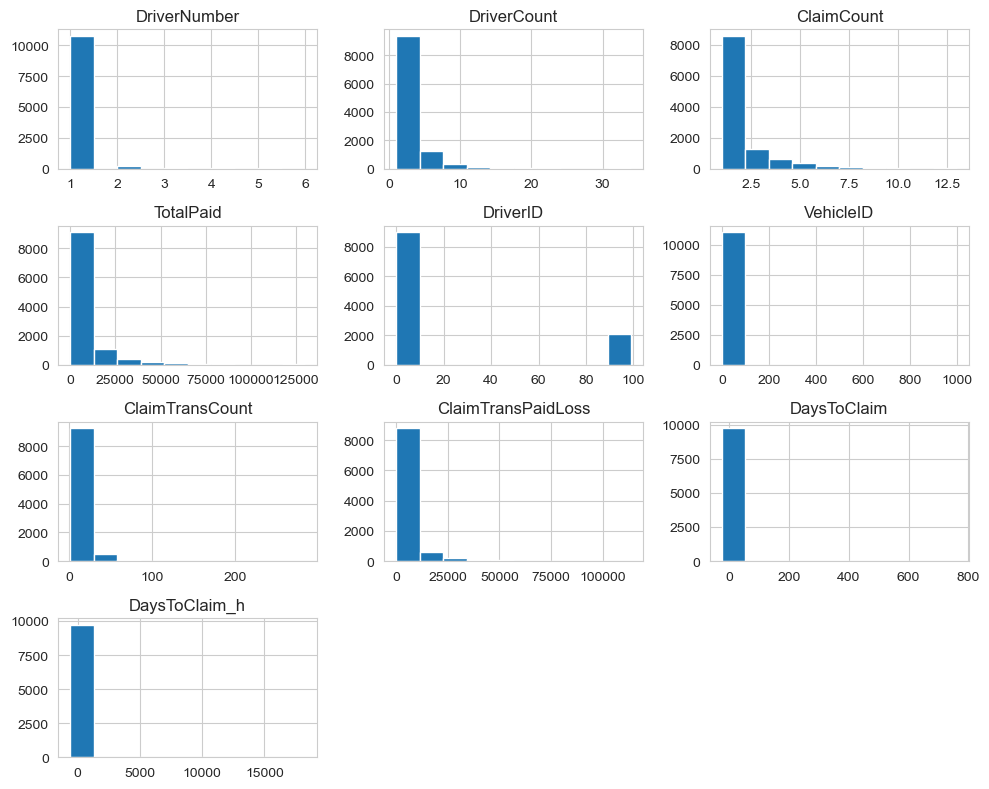

In [22]:
# Histograms
df_TheGeneral.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Frequency Counts for Categorical Columns

In [13]:
print(df_TheGeneral['ClaimType'].value_counts())
print(df_TheGeneral['AtFaultDescription'].value_counts())

PG_IVREARENDCV              1423
PG_COLLISIONINTERSECTION     854
PG_COLLISIONMERGE            833
PG_COLLISIONBACKING          796
FIXEDOBJCOLL                 726
                            ... 
PEDESTRIAN/FATALATIES          1
VNOP                           1
PG_UNLAWFULLY_PARKED           1
THEFTS                         1
DNOP                           1
Name: ClaimType, Length: 58, dtype: int64
Insured at fault          4976
Other party at fault      3122
No fault                  2574
Comparative Negligence     274
Fault unknown              123
Name: AtFaultDescription, dtype: int64


### Relationships and Correlations of all numeric columns

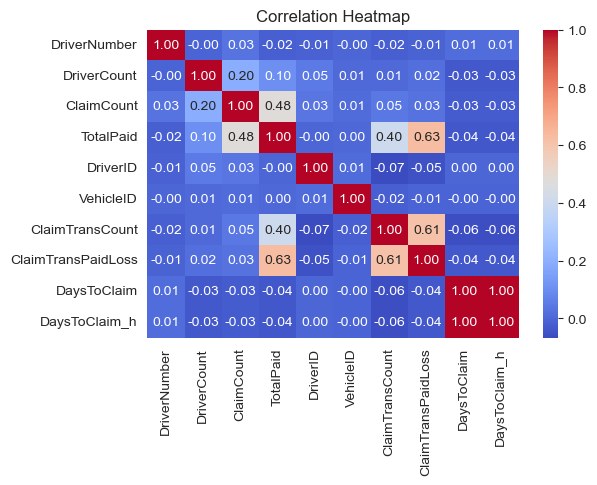

In [21]:
numeric_columns = df_TheGeneral.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatterplots for Relationships (ClaimCount and TotalPaid)

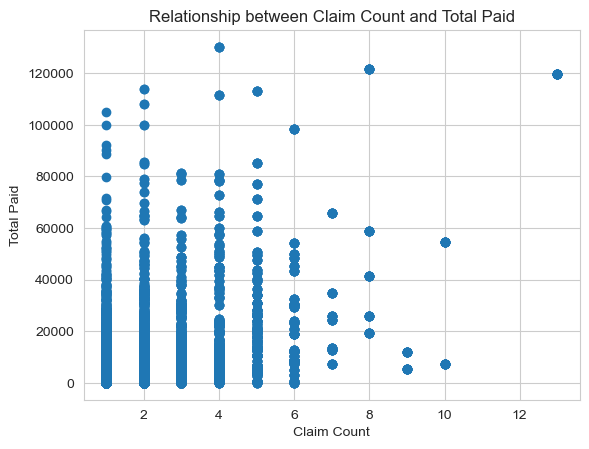

In [17]:
plt.scatter(df_TheGeneral['ClaimCount'], df_TheGeneral['TotalPaid'])
plt.xlabel('Claim Count')
plt.ylabel('Total Paid')
plt.title('Relationship between Claim Count and Total Paid')
plt.show()

### Exploratory Analysis of Master Quote

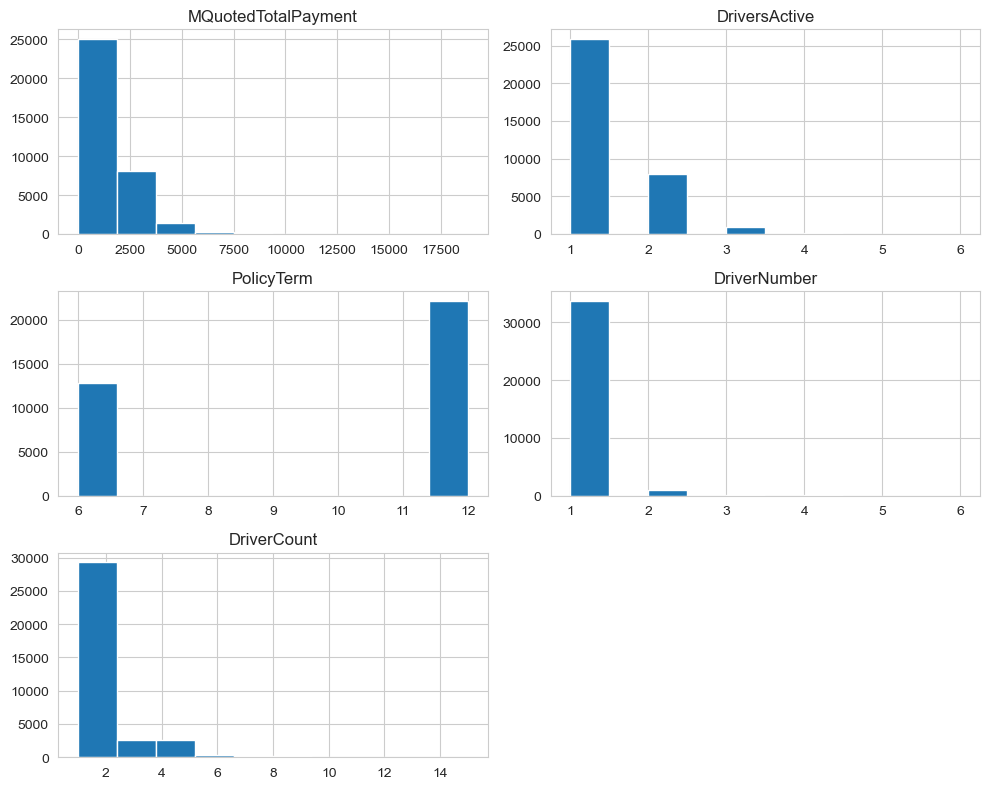

In [26]:
# Histograms
df_MasterQuote.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Frequency Counts for Categorical Columns:

In [27]:
print(df_MasterQuote['CoverageTypeDescription'].value_counts())
print(df_MasterQuote['GaragingState'].value_counts())

Liability Only    21016
Full Coverage     13713
Bond                246
Name: CoverageTypeDescription, dtype: int64
OH    2525
TN    2026
FL    1932
CO    1850
PA    1803
GA    1449
IN    1295
AZ    1255
CA    1136
TX    1083
AL    1010
VA     904
NC     867
WA     676
MN     640
WI     638
DC     607
SC     604
KY     599
IL     593
AR     561
UT     546
MO     523
ID     513
DE     491
VT     487
MD     460
ME     452
WV     451
OK     451
NH     449
LA     448
NE     443
CT     443
KS     437
OR     417
ND     415
MS     409
NM     407
IA     400
NY     395
WY     391
SD     389
MT     380
AK     305
NV     280
RI     140
Name: GaragingState, dtype: int64


In [29]:
# Right here it's showing the number of instances in every state

### Correlation Heatmap for Numerical Columns

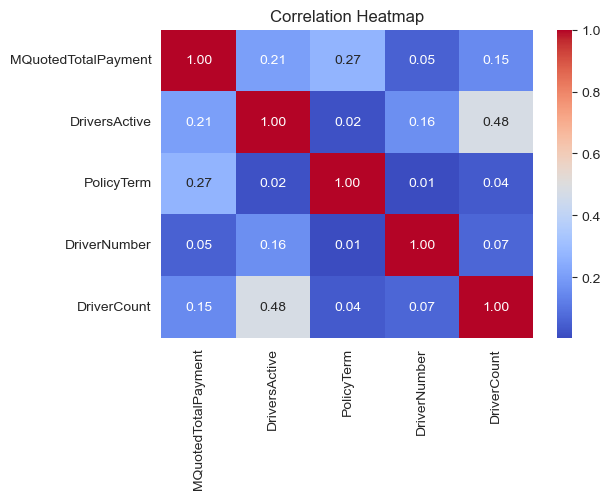

In [34]:
numeric_columns = df_MasterQuote.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatterplots for Relationships

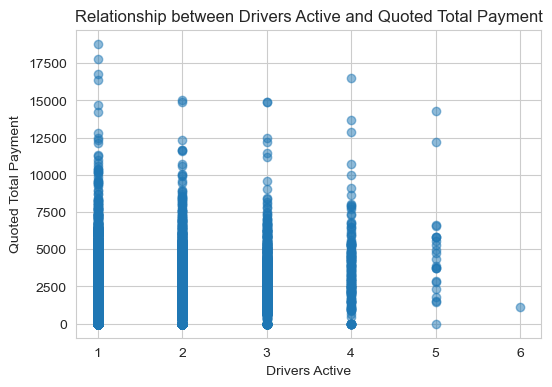

In [36]:
plt.figure(figsize=(6, 4))
plt.scatter(df_MasterQuote['DriversActive'], df_MasterQuote['MQuotedTotalPayment'], alpha=0.5)
plt.title('Relationship between Drivers Active and Quoted Total Payment')
plt.xlabel('Drivers Active')
plt.ylabel('Quoted Total Payment')
plt.grid(True)
plt.show()

# Modeling for predicting the MQuotedTotalPayment

### Data Preparation

In [81]:
# Feature Selection
selected_features = df_MasterQuote[['CoverageTypeDescription', 'DriversActive', 'GaragingState', 'PolicyTerm', 'NamedInsuredMaritalStatus']]

# Handle Categorical variables by converting categorical variables into numerical format
encoded_features = pd.get_dummies(selected_features, columns=['CoverageTypeDescription', 'GaragingState', 'NamedInsuredMaritalStatus'], drop_first=True)

In [82]:
# Split Data into Training and Testing Sets
X = encoded_features  # Features
y = df_MasterQuote['MQuotedTotalPayment']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the model

In [83]:
# Choosing a regression model, in this case, it's the Linear Regression Model
model = LinearRegression()

In [84]:
# Train the Model
model.fit(X_train, y_train)

LinearRegression()

### Evaluating the model

In [85]:
# Predictions and Evaluations
predictions = model.predict(X_test)

print('Linear Regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print("RMSE:", rmse)
print('R-squared:', r2_score(y_test, predictions))

Linear Regression Metrics:
Mean Absolute Error: 579.2816152598066
Mean Squared Error: 776936.4971633374
RMSE: 881.4400133663876
R-squared: 0.48302583084341955


### Repeating the same steps again with a lasso model instead

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

predictions = lasso.predict(X_test_scaled)

print('Lasso Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Lasso Metrics:
Mean Squared Error: 776975.8007679736
R-squared: 0.48299967819333045


### Repeating the same steps again with a Ridge Regression model instead

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 0.1

ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

predictions = ridge.predict(X_test_scaled)

print('Ridge Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Ridge Regression Metrics:
Mean Squared Error: 776936.7852556219
R-squared: 0.48302563914658203


### Repeating the same steps again with a Random Forest model instead

In [86]:
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_predictions)
rf_mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100

# Display the computed metrics for Random Forest
print('Random Forest Model Metrics:')
print('Mean Absolute Error (MAE):', rf_mae)
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('R-squared (R^2):', rf_r_squared)

Random Forest Model Metrics:
Mean Absolute Error (MAE): 540.1655881649197
Mean Squared Error (MSE): 708625.6443885505
Root Mean Squared Error (RMSE): 841.7990522616134
R-squared (R^2): 0.5284799271390124


* We can see that all models don't have a great R-Squared percentage but the model that had best R^2 value is the Random Forest Model which an R^2 percentage of 53% which is a moderate percentage.

# Graphical Representation and Analysis of Results

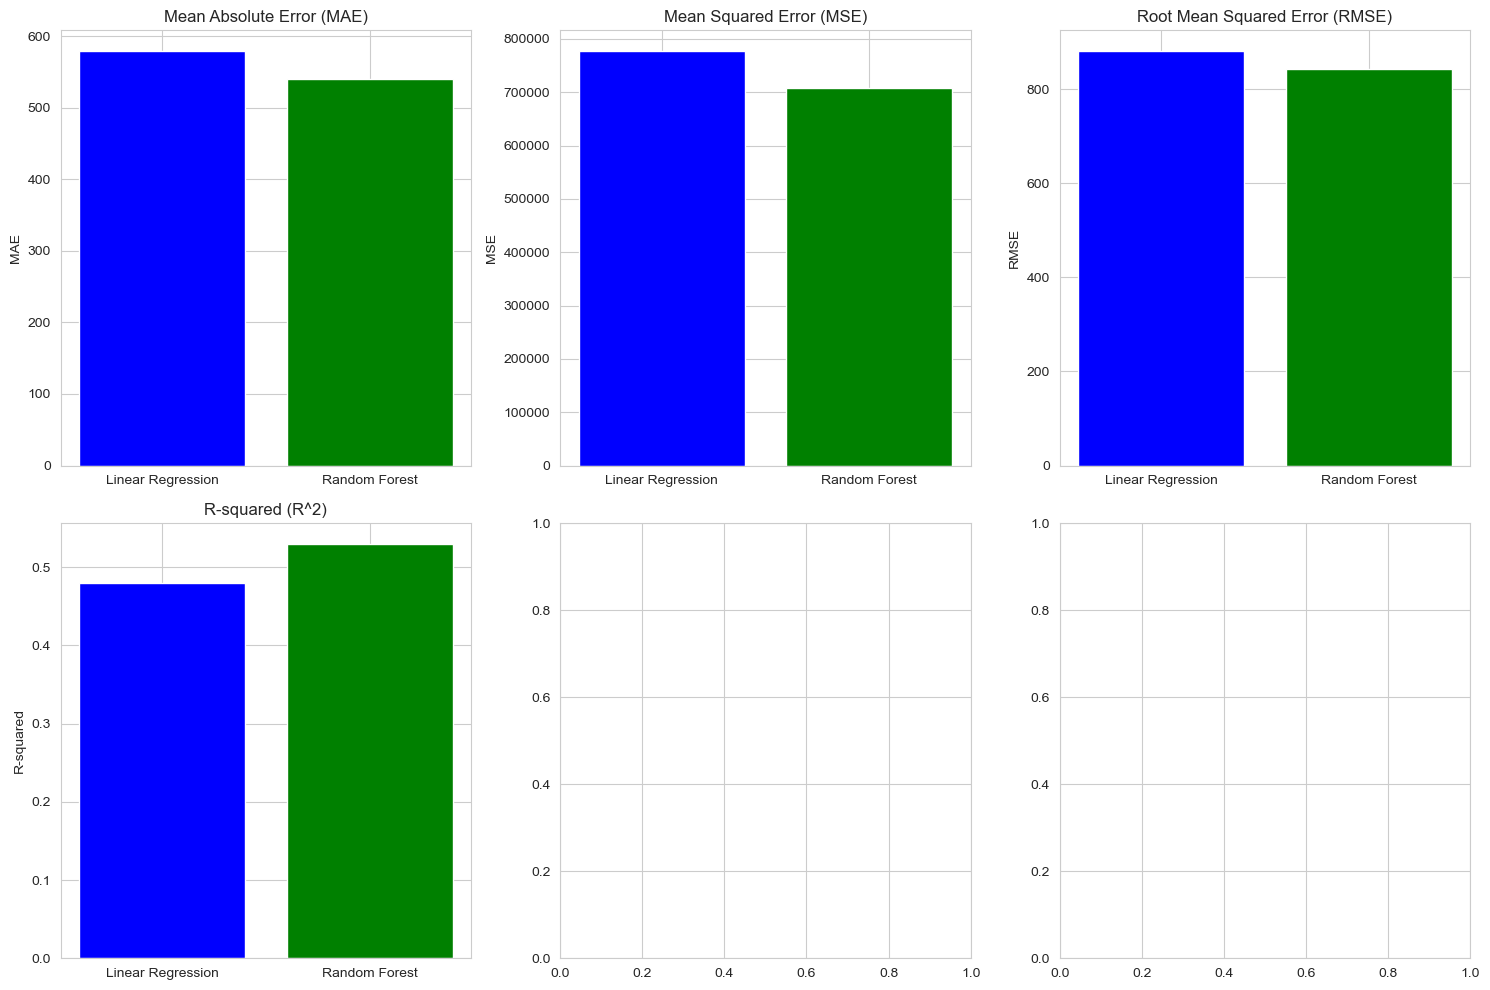

In [96]:
# Metrics for different models
models = ['Linear Regression', 'Random Forest']
mae_values = [579, 540]
mse_values = [776936, 708625]
rmse_values = [881, 842]
r_squared_values = [0.48, 0.53]

# Create subplots for each metric
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# MAE comparison
axs[0, 0].bar(models, mae_values, color=['blue', 'green'])
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_ylabel('MAE')

# MSE comparison
axs[0, 1].bar(models, mse_values, color=['blue', 'green'])
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('MSE')

# RMSE comparison
axs[0, 2].bar(models, rmse_values, color=['blue', 'green'])
axs[0, 2].set_title('Root Mean Squared Error (RMSE)')
axs[0, 2].set_ylabel('RMSE')

# R-squared comparison
axs[1, 0].bar(models, r_squared_values, color=['blue', 'green'])
axs[1, 0].set_title('R-squared (R^2)')
axs[1, 0].set_ylabel('R-squared')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Modeling For Policy Risk

Confusion Matrix:
[[1961    0]
 [   0  253]]
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0


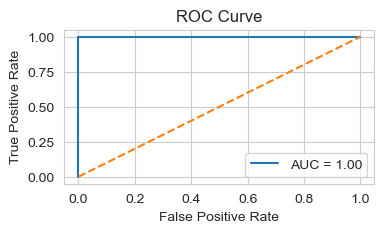

Feature Importance:
ClaimCount: 0.901626809975283
TotalPaid: 0.09086219092706092
PolicyClaimDuration: 0.0075109990976559935


In [123]:
# Logistic Regression

# Create a binary 'HighRisk' variable based on claim count
threshold_claim_count = 3
df_TheGeneral['HighRisk'] = (df_TheGeneral['ClaimCount'] > threshold_claim_count).astype(int)

# Feature Engineering: Duration between policy activation and first claim
df_TheGeneral['PolicyClaimDuration'] = (pd.to_datetime(df_TheGeneral['DateOfLoss']) - pd.to_datetime(df_TheGeneral['TermEffectiveDate'])).dt.days

# Define features and target variable
features = ['ClaimCount', 'TotalPaid', 'PolicyClaimDuration']  # features
X = df_TheGeneral[features]
y = df_TheGeneral['HighRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy, Sensitivity, Specificity
accuracy = accuracy_score(y_test, predictions)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# ROC Curve and AUC score
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(4, 2))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]  # Sort feature importance indices

# Display feature importance
print("Feature Importance:")
for idx in sorted_indices:
    print(f"{features[idx]}: {feature_importance[idx]}")

In [122]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha value for regularization
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

# Evaluate Ridge Regression
ridge_accuracy = accuracy_score(y_test, np.round(ridge_predictions))
ridge_conf_matrix = confusion_matrix(y_test, np.round(ridge_predictions))
ridge_sensitivity = ridge_conf_matrix[1, 1] / (ridge_conf_matrix[1, 1] + ridge_conf_matrix[1, 0])
ridge_specificity = ridge_conf_matrix[0, 0] / (ridge_conf_matrix[0, 0] + ridge_conf_matrix[0, 1])
ridge_auc = roc_auc_score(y_test, ridge_predictions)

# Display evaluation metrics
print("\nRidge Regression Metrics:")
print("Accuracy:", ridge_accuracy)
print("Confusion Matrix:")
print(ridge_conf_matrix)
print("Sensitivity:", ridge_sensitivity)
print("Specificity:", ridge_specificity)
print("AUC:", ridge_auc)


Ridge Regression Metrics:
Accuracy: 0.9471544715447154
Confusion Matrix:
[[1961    0    0]
 [ 111  136    6]
 [   0    0    0]]
Sensitivity: 0.5506072874493927
Specificity: 1.0
AUC: 1.0


In [108]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha value for regularization
lasso_model.fit(X_train, y_train)

# Evaluate Lasso Regression
lasso_accuracy = accuracy_score(y_test, np.round(lasso_predictions))
lasso_conf_matrix = confusion_matrix(y_test, np.round(lasso_predictions))
lasso_sensitivity = lasso_conf_matrix[1, 1] / (lasso_conf_matrix[1, 1] + lasso_conf_matrix[1, 0])
lasso_specificity = lasso_conf_matrix[0, 0] / (lasso_conf_matrix[0, 0] + lasso_conf_matrix[0, 1])
lasso_auc = roc_auc_score(y_test, lasso_predictions)

# Display evaluation metrics
print("Lasso Regression Metrics:")
print("Accuracy:", lasso_accuracy)
print("Confusion Matrix:")
print(lasso_conf_matrix)
print("Sensitivity:", lasso_sensitivity)
print("Specificity:", lasso_specificity)
print("AUC:", lasso_auc)

Lasso Regression Metrics:
Accuracy: 0.9295392953929539
Confusion Matrix:
[[1961    0    0]
 [ 154   97    2]
 [   0    0    0]]
Sensitivity: 0.38645418326693226
Specificity: 1.0
AUC: 0.9971781760132867


# Graphical Representation and Analysis of Results

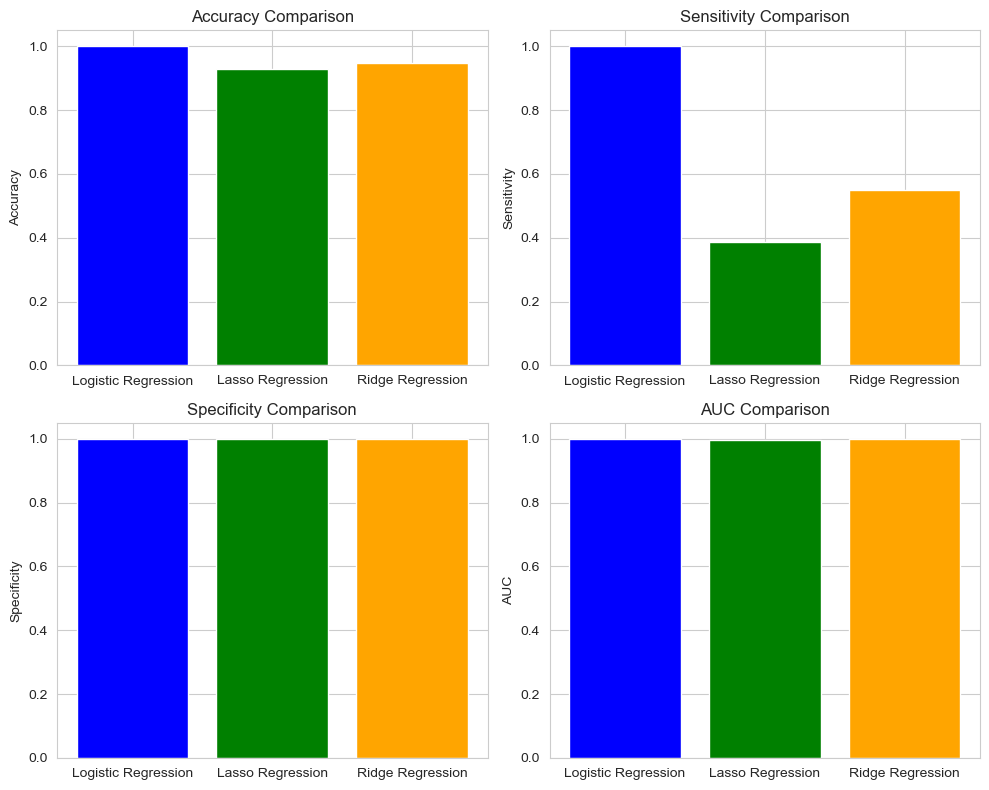

In [118]:
# Metrics for different models
models = ['Logistic Regression', 'Lasso Regression', 'Ridge Regression']
accuracies = [accuracy, lasso_accuracy, ridge_accuracy]
sensitivities = [sensitivity, lasso_sensitivity, ridge_sensitivity]
specificities = [specificity, lasso_specificity, ridge_specificity]
auc_scores = [auc, lasso_auc, ridge_auc]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Accuracy comparison
axs[0, 0].bar(models, accuracies, color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_ylabel('Accuracy')

# Sensitivity comparison
axs[0, 1].bar(models, sensitivities, color=['blue', 'green', 'orange'])
axs[0, 1].set_title('Sensitivity Comparison')
axs[0, 1].set_ylabel('Sensitivity')

# Specificity comparison
axs[1, 0].bar(models, specificities, color=['blue', 'green', 'orange'])
axs[1, 0].set_title('Specificity Comparison')
axs[1, 0].set_ylabel('Specificity')

# AUC comparison
axs[1, 1].bar(models, auc_scores, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('AUC Comparison')
axs[1, 1].set_ylabel('AUC')

# Display the plots
plt.tight_layout()
plt.show()